## Dataset shufled con sklearn

In [30]:
#Importando librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal     # for generating pdf
import seaborn as sb
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split




In [4]:
#Cargando dataset

path_file_benigno = "Datasets/Data_Benigno.csv"
path_file_ransomware = "Datasets/Data_Ransomware.csv"

dataBe = pd.read_csv(path_file_benigno)
dataRan = pd.read_csv(path_file_ransomware)


c_benigno = dataBe.shape[0]
c_Ransomware = dataRan.shape[0]

cantidadFinal = c_Ransomware if (c_benigno > c_Ransomware) else c_benigno

print("cantidad benigno: ", c_benigno)
print("cantidad ransomware: ", c_Ransomware)
print("cantidadFinal: ",cantidadFinal)

cantidad benigno:  137907
cantidad ransomware:  74888
cantidadFinal:  74888


In [5]:
data_Be_balanced = dataBe.head(cantidadFinal)
data_Ra_balanced = dataRan.head(cantidadFinal)

dataF = pd.concat([data_Be_balanced, data_Ra_balanced], axis=0)
dataF

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,153846.153800,1.040000e+07,Benigno,1,1,0
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,133333.333300,9.000000e+06,Benigno,1,1,0
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.000000,21.897488,142857.142900,7.928571e+06,Benigno,1,1,0
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.000000,0.000000,0.000000,0.000000e+00,Benigno,1,1,0
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.000000,38.878014,153846.153800,1.220000e+07,Benigno,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74883,1925248,55237504,46,54,8572,12611,52.0,75,405,75.0,405.0,0.000000,0.000000,0.398660,6.901801e+01,Ransomware,0,0,1
74884,6935,55118503,51,55,8844,12692,52.0,52,52,52.0,52.0,0.000000,0.000000,3944.773176,7.218935e+05,Ransomware,0,0,1
74885,4053974,30711742,24,25,2652,12942,52.0,40,-1,40.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,Ransomware,0,0,1
74886,5744,66134134,11,16,1198,16758,52.0,1390,40,1390.0,40.0,0.447214,0.000000,0.000000,0.000000e+00,Ransomware,0,0,1


In [7]:
data = dataF.drop(['Label','benignoLabel','ransomwareLabel'], axis=1).copy()
data

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,binaryLabel
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,153846.153800,1.040000e+07,1
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,133333.333300,9.000000e+06,1
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.000000,21.897488,142857.142900,7.928571e+06,1
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.000000,0.000000,0.000000,0.000000e+00,1
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.000000,38.878014,153846.153800,1.220000e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74883,1925248,55237504,46,54,8572,12611,52.0,75,405,75.0,405.0,0.000000,0.000000,0.398660,6.901801e+01,0
74884,6935,55118503,51,55,8844,12692,52.0,52,52,52.0,52.0,0.000000,0.000000,3944.773176,7.218935e+05,0
74885,4053974,30711742,24,25,2652,12942,52.0,40,-1,40.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,0
74886,5744,66134134,11,16,1198,16758,52.0,1390,40,1390.0,40.0,0.447214,0.000000,0.000000,0.000000e+00,0


In [8]:
X = data.drop(['binaryLabel'],axis=1).copy()
Y = data[['binaryLabel']].copy()

In [9]:
X

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,153846.153800,1.040000e+07
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,133333.333300,9.000000e+06
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.000000,21.897488,142857.142900,7.928571e+06
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.000000,0.000000,0.000000,0.000000e+00
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.000000,38.878014,153846.153800,1.220000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74883,1925248,55237504,46,54,8572,12611,52.0,75,405,75.0,405.0,0.000000,0.000000,0.398660,6.901801e+01
74884,6935,55118503,51,55,8844,12692,52.0,52,52,52.0,52.0,0.000000,0.000000,3944.773176,7.218935e+05
74885,4053974,30711742,24,25,2652,12942,52.0,40,-1,40.0,0.0,1.000000,0.000000,0.000000,0.000000e+00
74886,5744,66134134,11,16,1198,16758,52.0,1390,40,1390.0,40.0,0.447214,0.000000,0.000000,0.000000e+00


In [10]:
Y

,binaryLabel
0,1
1,1
2,1
3,1
4,1
...,...
74883,0
74884,0
74885,0
74886,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [14]:
X_train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s
18347,2078500,12,0,2304,4818,128,-1.0,83,-1,83.000000,0.000000,1.000000,0.000000,0.000000,0.000000
7052,38263003,19,26,2149,18564,40,40.0,489,1390,113.105263,714.000000,166.413606,586.516394,1.176071,541.332315
52817,382000,3,3,268,164,52,52.0,156,60,89.333333,54.666667,57.869105,4.564355,15.706806,1130.890052
32771,53823018,18,7,3082,10543,294,-1.0,52,-1,52.000000,0.000000,1.000000,0.000000,0.062024,3.225268
51486,0,23,8,2507,44,487,-1.0,52,-1,52.000000,0.000000,0.000000,0.000000,23.863257,4827.195931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67226,73936,3,3,268,164,52,52.0,156,60,89.333333,54.666667,57.869105,4.564355,81.151266,5842.891149
26450,673632110,2,0,104,0,52,-1.0,52,-1,52.000000,0.000000,1.000000,0.000000,0.002969,0.154387
3287,2062,18,4,1211,5428,10,52.0,52,52,46.000000,0.000000,8.426150,0.000000,0.127797,5.878640
66269,2459,1,1,52,52,52,52.0,52,52,52.000000,52.000000,0.000000,0.000000,813.338756,42293.615290


In [15]:
X_test

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s
59818,1000,2,0,104,0,52,-1.0,52,-1,52.000000,0.00,1.000000,0.000000,2000.000000,1.040000e+05
50956,136868,2,1,139,85,52,85.0,259,583,267.500000,183.75,425.682981,266.292915,0.848432,1.914275e+02
72083,14999254,5,0,300,0,60,-1.0,60,-1,60.000000,0.00,0.500000,0.000000,0.333350,2.000099e+01
13068,3,6,2,1330,23403,75,-1.0,40,-1,40.000000,0.00,1.000000,0.000000,0.161343,9.680578e+00
61949,61074380,23,2,1957,1039,606,52.0,1093,789,399.000000,242.00,601.021214,364.827356,68.886989,2.355935e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42668,159947281,22,5,1026,5067,404,-1.0,52,-1,52.000000,0.00,1.000000,0.000000,1000000.000000,4.000000e+07
51865,6610635,3,0,187,0,52,-1.0,83,-1,62.333333,0.00,17.883885,0.000000,0.453814,2.828775e+01
63489,0,24,4,883,23892,624,-1.0,52,-1,52.000000,0.00,0.000000,0.000000,33.535665,4.124887e+03
54706,226400,3,4,427,417,52,52.0,315,253,142.333333,104.25,149.585539,99.236670,30.918728,3.727915e+03


In [16]:
y_train

,binaryLabel
18347,0
7052,1
52817,1
32771,0
51486,0
...,...
67226,1
26450,1
3287,1
66269,1


In [17]:
y_test

,binaryLabel
59818,1
50956,1
72083,1
13068,0
61949,0
...,...
42668,0
51865,1
63489,0
54706,1


In [18]:
model = KMeans(n_clusters=2)
model.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
model.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [22]:
metrics.accuracy_score(y_test,model.predict(X_test))

0.496261083217605

In [23]:
from sklearn.mixture import GaussianMixture

In [24]:
modelG = GaussianMixture(n_components=3)
modelG.fit(X_train,y_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [25]:
modelG.score

<bound method BaseMixture.score of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)>

In [28]:
metrics.accuracy_score(y_test, modelG.predict(X_test))

0.2643147099668839

In [33]:
X.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s
count,1.497760e+05,1.497760e+05,149776.000000,1.497760e+05,1.497760e+05,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,149776.000000,1.497760e+05,1.497760e+05
mean,3.155877e+07,2.778276e+04,7.839981,1.306556e+03,1.209905e+04,199.951508,49.994492,235.628752,246.501088,107.538422,136.193752,77.350531,87.568348,4.523757e+04,2.349517e+06
std,2.056215e+08,1.995322e+06,205.178595,3.191709e+04,2.995728e+05,405.653757,87.134555,333.295591,421.729064,117.907072,233.270876,144.871525,181.026950,1.973894e+05,1.051974e+07
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.928000e+03,2.000000e+00,1.000000,1.040000e+02,5.200000e+01,52.000000,-1.000000,52.000000,-1.000000,52.000000,0.000000,0.000000,0.000000,1.483442e-01,1.674836e+01
50%,1.142135e+05,4.000000e+00,2.000000,5.190000e+02,1.160000e+03,52.000000,52.000000,59.000000,52.000000,54.666667,52.000000,1.000000,0.000000,4.728948e+00,5.893092e+02
75%,7.696119e+06,1.300000e+01,6.000000,1.877000e+03,1.271100e+04,348.000000,52.000000,331.000000,271.000000,114.000000,143.000000,82.805742,41.286196,8.620674e+01,1.286254e+04
max,1.154108e+10,2.630639e+08,53758.000000,1.220839e+07,7.463559e+07,126552.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,954.593631,946.108345,2.000000e+06,4.920000e+08


X size:  1684980
Y size:  112332


ValueError: x and y must be the same size

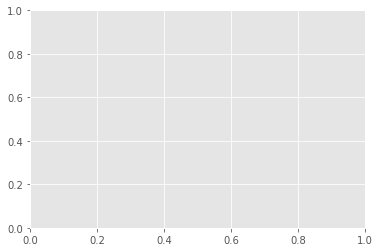

In [52]:
print("X size: ",X_train.size)
print("Y size: ",y_train.size)

plt.scatter(X_train,y_train,marker='o')